In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
full_data = pd.read_csv(r"C:\Users\Edwin\Desktop\OT2-DOE\PlanPrepareProcess\Temp or Working\06_28_21_ODE_SDS_Unblanked_Abs")

wavelength_columns = [col for col in full_data.columns if 'nm' in col]
wavelengths = [float(wavelength.replace("nm","")) for wavelength in wavelength_columns]
full_spectra = full_data[wavelength_columns]

full_data

,UID,Labware,Slot,Well,ODE concentration wtf,SDS concentration wtf,ethanol concentration wtf,water concentration wtf,ODE amount mass g,ODE amount volume uL,...,655.0nm,660.0nm,665.0nm,670.0nm,675.0nm,680.0nm,685.0nm,690.0nm,695.0nm,700.0nm
0,S2_A1_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A1,0.000,0.0,0.100000,0.900000,0.000,0.000000,...,0.038,0.038,0.038,0.038,0.038,0.039,0.039,0.039,0.039,0.039
1,S2_A2_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A2,0.000,0.0,0.177778,0.822222,0.000,0.000000,...,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.038
2,S2_A3_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A3,0.000,0.0,0.255556,0.744444,0.000,0.000000,...,0.038,0.038,0.037,0.038,0.037,0.037,0.037,0.037,0.037,0.038
3,S2_A4_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A4,0.000,0.0,0.333333,0.666667,0.000,0.000000,...,0.040,0.040,0.040,0.040,0.040,0.039,0.039,0.039,0.039,0.040
4,S2_A5_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A5,0.000,0.0,0.411111,0.588889,0.000,0.000000,...,0.039,0.039,0.039,0.039,0.039,0.039,0.039,0.039,0.039,0.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,S2_H7_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,H7,0.001,0.0,0.488889,0.510111,0.001,1.267427,...,0.876,0.874,0.871,0.869,0.866,0.864,0.861,0.859,0.857,0.855
91,S2_H8_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,H8,0.001,0.0,0.566667,0.432333,0.001,1.267427,...,0.647,0.646,0.644,0.642,0.640,0.638,0.636,0.634,0.632,0.630
92,S2_H9_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,H9,0.001,0.0,0.644444,0.354556,0.001,1.267427,...,0.429,0.428,0.426,0.425,0.424,0.423,0.422,0.421,0.420,0.419
93,S2_H10_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,H10,0.001,0.0,0.722222,0.276778,0.001,1.267427,...,0.225,0.224,0.224,0.223,0.223,0.222,0.222,0.221,0.221,0.221


In [3]:
cb_0 = full_data[full_data['ODE concentration wtf'] == 0]
blanks = cb_0[cb_0['ODE concentration wtf'] == 0].copy()
samples = full_data.copy()
blanked_samples = samples.copy()
blanks

,UID,Labware,Slot,Well,ODE concentration wtf,SDS concentration wtf,ethanol concentration wtf,water concentration wtf,ODE amount mass g,ODE amount volume uL,...,655.0nm,660.0nm,665.0nm,670.0nm,675.0nm,680.0nm,685.0nm,690.0nm,695.0nm,700.0nm
0,S2_A1_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A1,0.0,0.0,0.100000,0.900000,0.0,0.0,...,0.038,0.038,0.038,0.038,0.038,0.039,0.039,0.039,0.039,0.039
1,S2_A2_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A2,0.0,0.0,0.177778,0.822222,0.0,0.0,...,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.037,0.038
2,S2_A3_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A3,0.0,0.0,0.255556,0.744444,0.0,0.0,...,0.038,0.038,0.037,0.038,0.037,0.037,0.037,0.037,0.037,0.038
3,S2_A4_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A4,0.0,0.0,0.333333,0.666667,0.0,0.0,...,0.040,0.040,0.040,0.040,0.040,0.039,0.039,0.039,0.039,0.040
4,S2_A5_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A5,0.0,0.0,0.411111,0.588889,0.0,0.0,...,0.039,0.039,0.039,0.039,0.039,0.039,0.039,0.039,0.039,0.039
5,S2_A6_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A6,0.0,0.0,0.488889,0.511111,0.0,0.0,...,0.038,0.038,0.038,0.038,0.038,0.038,0.038,0.038,0.038,0.038
6,S2_A7_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A7,0.0,0.0,0.566667,0.433333,0.0,0.0,...,0.040,0.040,0.040,0.040,0.040,0.040,0.040,0.040,0.040,0.040
7,S2_A8_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A8,0.0,0.0,0.644444,0.355556,0.0,0.0,...,0.040,0.040,0.039,0.040,0.040,0.040,0.040,0.040,0.040,0.040
8,S2_A9_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A9,0.0,0.0,0.722222,0.277778,0.0,0.0,...,0.038,0.038,0.038,0.038,0.038,0.038,0.038,0.038,0.038,0.038
9,S2_A10_07-02-2021,Abgene 96 Well Plate 2200 ÂµL,2.0,A10,0.0,0.0,0.800000,0.200000,0.0,0.0,...,0.042,0.042,0.042,0.042,0.042,0.042,0.042,0.042,0.041,0.042


In [4]:
samples_etoh = samples.groupby('ethanol concentration wtf')
blanks_etoh = blanks.groupby('ethanol concentration wtf')

In [5]:
blanked_spectras_list = []
for etoh, group in samples_etoh:
    single_etoh_samples = group
    single_etoh_spectras = single_etoh_samples[wavelength_columns]
    blank_sample = blanks[blanks['ethanol concentration wtf']==etoh]
    blank_spectra = blank_sample[wavelength_columns]

    blanked_spectras = single_etoh_spectras-blank_spectra.values
    blanked_spectras_list.append(blanked_spectras)

In [6]:
pd.concat(blanked_spectras_list,axis=0)

,300.0nm,305.0nm,310.0nm,315.0nm,320.0nm,325.0nm,330.0nm,335.0nm,340.0nm,345.0nm,...,655.0nm,660.0nm,665.0nm,670.0nm,675.0nm,680.0nm,685.0nm,690.0nm,695.0nm,700.0nm
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10,0.293,0.283,0.270,0.260,0.250,0.241,0.231,0.224,0.215,0.207,...,0.038,0.037,0.037,0.036,0.035,0.033,0.033,0.032,0.031,0.031
20,0.584,0.571,0.556,0.543,0.530,0.517,0.505,0.495,0.484,0.473,...,0.189,0.187,0.185,0.184,0.182,0.179,0.177,0.176,0.175,0.173
30,0.699,0.682,0.665,0.650,0.635,0.621,0.607,0.596,0.583,0.570,...,0.257,0.255,0.253,0.251,0.250,0.247,0.245,0.243,0.242,0.240
40,0.657,0.627,0.607,0.591,0.572,0.557,0.542,0.528,0.515,0.502,...,0.237,0.236,0.234,0.232,0.231,0.227,0.226,0.224,0.222,0.220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.001,-0.001,-0.003,-0.004,-0.004,-0.003,-0.004,-0.003,-0.003,-0.003,...,-0.004,-0.004,-0.004,-0.004,-0.004,-0.004,-0.004,-0.004,-0.003,-0.004
67,-0.005,-0.006,-0.008,-0.008,-0.007,-0.006,-0.006,-0.004,-0.003,-0.003,...,-0.002,-0.003,-0.003,-0.003,-0.003,-0.003,-0.003,-0.003,-0.002,-0.003
76,-0.008,-0.006,-0.008,-0.009,-0.008,-0.007,-0.007,-0.006,-0.005,-0.005,...,-0.003,-0.003,-0.003,-0.003,-0.003,-0.003,-0.003,-0.003,-0.002,-0.003
85,-0.004,-0.004,-0.005,-0.005,-0.005,-0.004,-0.005,-0.004,-0.004,-0.004,...,-0.002,-0.002,-0.002,-0.002,-0.003,-0.003,-0.003,-0.003,-0.002,-0.002


In [7]:
blanked_samples[wavelength_columns] = pd.concat(blanked_spectras_list,axis=0)
blanked_samples.to_csv(r'06_28_21_ODE_SDS_Blanked_Abs', index=False)

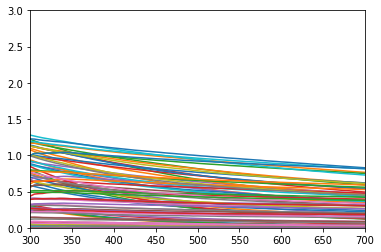

In [8]:
spectras = blanked_samples[wavelength_columns]
for i, spec in spectras.iterrows():
    spec = list(spec)
    plt.plot(wavelengths, spec)
    plt.xlim([300,700])
    plt.ylim([0,3])